<a href="https://colab.research.google.com/github/A-Wadhwani/ME498-Project/blob/main/03_LightGBM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Open drive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Download LightGBM
! git clone --recursive https://github.com/Microsoft/LightGBM

# Enable LightGBM with GPU acceleration
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;    


In [ ]:
# GPU Usage tracking
!pip install wandb
import wandb
wandb.init()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import tensorflow as tf
import pandas as pd
import random
import time
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error

import lightgbm as lgb
print("TensorFlow version: ",tf.__version__)  #print the version of tensorflow

TensorFlow version:  2.4.1


In [ ]:
# Reading training and testing dataset files
path = "drive/My Drive/ASHRAE_DATA/"
x_train = pd.read_csv(path + "x_train.csv", index_col=0)
x_test = pd.read_csv(path + "x_test.csv", index_col=0)
y_train = pd.read_csv(path + "y_train.csv", index_col=0)
y_test = pd.read_csv(path + "y_test.csv", index_col=0)

In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024067 entries, 13765924 to 158735
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   site_id             1024067 non-null  int64  
 1   air_temperature     1024067 non-null  float64
 2   dew_temperature     1024067 non-null  float64
 3   sea_level_pressure  1024067 non-null  float64
 4   wind_direction      1024067 non-null  float64
 5   wind_speed          1024067 non-null  float64
 6   building_id         1024067 non-null  int64  
 7   primary_use         1024067 non-null  int64  
 8   square_feet         1024067 non-null  int64  
 9   year_built          1024067 non-null  float64
 10  floor_count         1024067 non-null  float64
 11  Year                1024067 non-null  int64  
 12  Month               1024067 non-null  int64  
 13  Day_of_Month        1024067 non-null  int64  
 14  Day_of_Year         1024067 non-null  int64  
 15  Day_of_We

In [ ]:
# Create LightGBM Regressor model
start_time = time.time()
model = lgb.LGBMRegressor(n_estimators=20000, n_jobs=-1, metric='rmse', device="gpu")
model.fit(x_train, y_train)
end_time = time.time()
print("Training Time: ", end_time-start_time, " seconds")

Training Time:  463.6980028152466  seconds


In [ ]:
start_time = time.time()
y_res = model.predict(x_test)
end_time = time.time()
print("Prediction Time: ", end_time-start_time, " seconds")

Prediction Time:  432.84678173065186  seconds


In [ ]:
print("RMSE: ", mean_squared_error(y_test, y_res))
print("R^2 Score: ", r2_score(y_test, y_res))

RMSE:  475.9749880802559
R^2 Score:  0.994336980280572


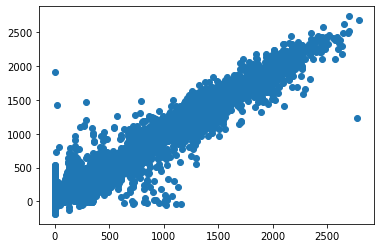

In [ ]:
plt.scatter(y_test, y_res)
plt.show()